## NOTE: 
### As Instagram is a dynamic site , so it is not necessary the answers of all the questions remain same.

In [14]:
from bs4 import BeautifulSoup,NavigableString
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import NoSuchElementException
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date

In [15]:
import nltk
import pandas as pd
import re
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
import string
from nltk.tokenize import sent_tokenize,word_tokenize,SpaceTokenizer
from nltk.corpus import wordnet

In [16]:
from selenium import webdriver
print("Which browser you want to use?? Enter C for Chrome and F for Firefox")
option = input()
if option == 'C' or option == 'c':
    driver = webdriver.Chrome(executable_path = "D:/Downloads/chromedriver")
if option == 'F' or option == 'f':
    driver = webdriver.Firefox(executable_path = "D:\Downloads\geckodriver")


Which browser you want to use?? Enter C for Chrome and F for Firefox
c


In [17]:
driver.get("https://www.instagram.com/")
wait = WebDriverWait(driver, 10)
element = wait.until(EC.presence_of_element_located((By.XPATH, "//button[@type = 'button']")))

##### I am logging through Facebook

In [18]:
def login():

    reg = driver.find_element_by_xpath("//button[@type = 'button']")

    reg.click()

    username = "9958233139"#"SAMPLEUSERNAME"
    password = "kittu1310"#"SAMPLEPASSWORD"


    driver.find_element_by_xpath("//input[@id = 'email']").send_keys(username)
    driver.find_element_by_xpath("//input[@id = 'pass']").send_keys(password)

    driver.find_element_by_xpath("//button[@id = 'loginbutton']").click()


    wait = WebDriverWait(driver, 10)
    element = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class = 'mt3GC']/button")))

    # This line is to TURN OFF NOTIFICATIONS as when I logged in it asked me to turn on or off notifications.
    try:
        driver.find_elements_by_xpath("//div[@class = 'mt3GC']/button")[1].click()
    except NoSuchElementException:
        pass

In [19]:
login()

# 1


In [20]:
def find_handle_names():
    driver.find_element_by_xpath("//div[@class = 'LWmhU _0aCwM']/div").click()

    driver.find_element_by_xpath("//div[@class = 'LWmhU _0aCwM']/input").send_keys("food")

    wait = WebDriverWait(driver, 10)
    element = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class = 'fuqBx']/a")))

    elements_in_food_list = driver.find_elements_by_xpath("//div[@class = 'fuqBx']/a")

    handles_food = []
    for element in elements_in_food_list:
        attr1 = BeautifulSoup(element.get_attribute('outerHTML'),'html.parser').a.div.div['class'] 
        attr2 = BeautifulSoup(element.get_attribute('outerHTML'),'html.parser').a.div.span['class']
        if 'coreSpriteLocation' in attr1:
            pass
        elif 'coreSpriteHashtag' in attr2:
            pass
        else:
            handles_food.append(BeautifulSoup(element.get_attribute('outerHTML'),'html.parser').find('span',{'class':"Ap253"}).text)
    handles_food.remove('food')
    return handles_food

In [21]:
handles_food = find_handle_names()

In [37]:
for handle in handles_food:
    print(handle)

foodrush.recipe
foodtalkindia
mumbaifoodie
_foodasia
foodbible
foodys
iharnoor
the_punjabi_foodie
yourfoodlab
dilsefoodie
foodiee_love
foodviraam
cchannel_food
foodon.snu
foodbeast
foodandwine
the_dainty_deity
foodstirs
redheadpassenger
foodnetwork
foodgasm_jaipur
food._.connoisseur
foodlover___13
_my_food_cravings_
foodofmumbai
foodlty
meghnasfoodmagic
foodydiy.s
rajshrifood
thisisinsiderfood
_.haqsefoodie._
fooddrifter
turban_foodie
_foodiebunch_
foodytops
foodbloggerai
foodie_incarnate
forkmeetsfood
dilli_wale_foodies
food.marine
delhifoodwalks
foodyvid
ndtv_food
foodconnectindia
foodhubster
khaata_rahe_mera_dil
thehungryfriends
foodpandaindia
buzzfeedfood
raipurfoodpedia
thefooddrug
food_lovers_mad
foody.boss
food.spy.ir
foodgod
dillifoodies
popxoyum
foodsememes
ashpazidorehami
foodhallindia
scrollfood
sweety.foody
jollyfoodfellow
saalafoodie
thekitchenmccabe
foodyviral
sorrentinabyfoodhall
wirallyfood
skyfoody
diyfoodys
the_foodie_dad
foodofchefs
foodpanda_pakistan
foodiebm
health

In [22]:
driver.find_element_by_xpath("//div[@class = 'LWmhU _0aCwM']/input").clear()
driver.find_element_by_xpath("//div[contains(@class,'coreSpriteSearchClear')]").click()

In [23]:
def find_num_followers(handles_food):
    handle_follower = {}
    for handle in handles_food[:10]:
        time.sleep(1)
        wait = WebDriverWait(driver, 20)
        element = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class = 'LWmhU _0aCwM']/div")))
        driver.find_element_by_xpath("//div[@class = 'LWmhU _0aCwM']/div").click()
        driver.find_element_by_xpath("//div[@class = 'LWmhU _0aCwM']/input").send_keys(handle)

        time.sleep(2)
        wait = WebDriverWait(driver, 20)
        element = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class = 'fuqBx']/a")))
        driver.find_element_by_xpath("//div[@class = 'fuqBx']/a").click()

        time.sleep(4)
        wait = WebDriverWait(driver, 20)
        element = wait.until(EC.presence_of_element_located((By.XPATH, "//ul[@class = 'k9GMp ']/li")))
        handle_follower[handle] = BeautifulSoup(driver.find_elements_by_xpath("//ul[@class = 'k9GMp ']/li")[1].get_attribute("innerHTML"),'html.parser').a.text.strip(" followers")
    return handle_follower

In [25]:
handle_follower = find_num_followers(handles_food)

In [26]:
def sort_followers(handle_follower):
    for key in handle_follower:
        if handle_follower[key][-1].isdigit():
            handle_follower[key] = int(float(handle_follower[key]))
        elif handle_follower[key][-1].isalpha():
            if handle_follower[key][-1] == 'k':
                handle_follower[key] = int(float(handle_follower[key].strip('k'))*1000)
            elif handle_follower[key][-1] == 'm':
                handle_follower[key] = int(float(handle_follower[key].strip('m'))*1000000)
    
    top_five_handles = np.array(sorted(handle_follower.items(), key=lambda kv: kv[1],reverse = True)[:5])
    
    y_ticks = np.arange(0,11000000,1000000)
    x_pos = []
    y_pos = []

    for i in top_five_handles:
        x_pos.append(i[0])
        y_pos.append(int(i[1]))


    plt.bar(x_pos,y_pos)
    plt.xticks(rotation = 45)
    plt.yticks(y_ticks,rotation = 30)
    plt.ylabel('Number of Followers')
    plt.title("Number of Followers of Top 5 Insta-Handles")
    for i in range(len(x_pos)):
        plt.text(x_pos[i],y_pos[i]+3000,int(float(y_pos[i])),horizontalalignment='center')
    plt.show()
    
    return x_pos
    

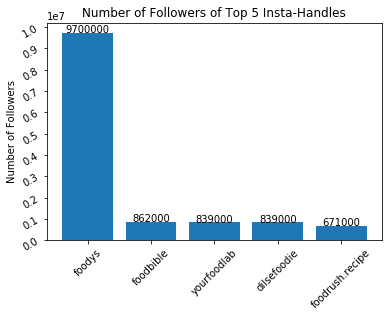

In [27]:
x_pos = sort_followers(handle_follower)

In [29]:
driver.find_element_by_xpath("//div[@class = 'cq2ai']").click()

In [56]:
def manage_posts(x_pos):
    total_posts = {}
    for handle in x_pos:
        driver.find_element_by_xpath("//div[@class = 'LWmhU _0aCwM']/div").click()
        driver.find_element_by_xpath("//div[@class = 'LWmhU _0aCwM']/input").send_keys(handle)
        wait = WebDriverWait(driver, 10)
        element = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class = 'fuqBx']/a")))
        driver.find_element_by_xpath("//div[@class = 'fuqBx']/a").click()

        print("Posts by",handle)
        count = 0
        for post in driver.find_elements_by_xpath("//article[@class = 'ySN3v']//div[contains(@class,'Nnq7C')]/div"):
            today = date.today()
            time.sleep(2)
            post.click()
            time.sleep(2)
            wait = WebDriverWait(driver, 10)
            element = wait.until(EC.presence_of_element_located((By.XPATH, "//a[@class = 'c-Yi7']")))
            date_post = BeautifulSoup(driver.find_element_by_xpath("//a[@class = 'c-Yi7']").get_attribute("outerHTML"),'html.parser').time["datetime"]
            date_post = date_post.split("T")[0]
            post_py_date = datetime.date(int(float(date_post.split("-")[0])),int(float(date_post.split("-")[1])),int(float(date_post.split("-")[2])))

            driver.find_element_by_xpath("//button[@class = 'ckWGn']").click()
            if (today - post_py_date).days > 3:
                if count == 0:
                    print("There are no posts in last 3 days")
                elif count > 0:
                    print("No further post from last 3 days")
                break
            else:
                count = count + 1
                print("Post Dated:",post_py_date)
        print("Total number of posts from last 3 days: ",count)
        print()
        total_posts[handle] = count
    return total_posts

In [60]:
total_posts = manage_posts(x_pos)

Posts by foodys
Post Dated: 2020-01-24
Post Dated: 2020-01-23
Post Dated: 2020-01-22
Post Dated: 2020-01-21
No further post from last 3 days
Total number of posts from last 3 days:  4

Posts by foodbible
There are no posts in last 3 days
Total number of posts from last 3 days:  0

Posts by yourfoodlab
There are no posts in last 3 days
Total number of posts from last 3 days:  0

Posts by dilsefoodie
Post Dated: 2020-01-24
Post Dated: 2020-01-22
Post Dated: 2020-01-21
No further post from last 3 days
Total number of posts from last 3 days:  3

Posts by foodrush.recipe
Post Dated: 2020-01-23
Post Dated: 2020-01-21
No further post from last 3 days
Total number of posts from last 3 days:  2



In [61]:
def plot_data_posts(total_posts):
    total_post_array = np.array(sorted(total_posts.items(), key=lambda kv: kv[1],reverse = True))

    y_ticks = np.arange(0,11,1)
    x_pos = []
    y_pos = []

    for i in total_post_array:
        x_pos.append(i[0])
        y_pos.append(int(i[1]))


    plt.bar(x_pos,y_pos,width = 0.6,color = 'orange',edgecolor = 'black')
    plt.xticks(rotation = 45)
    plt.yticks(y_ticks,rotation = 30)
    plt.ylabel('Number of Posts in last 3 days')
    plt.title("Number of Posts by Top 5 Insta-Handles")
    for i in range(len(x_pos)):
        plt.text(x_pos[i],y_pos[i]+0.2,int(float(y_pos[i])),horizontalalignment='center')
    plt.show()

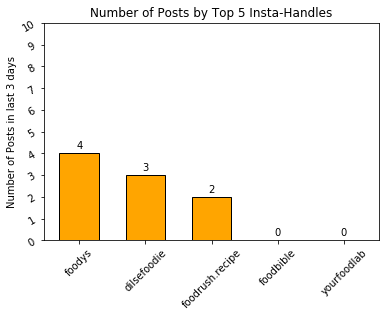

In [62]:
plot_data_posts(total_posts)

In [63]:
driver.find_element_by_xpath("//div[@class = 'LWmhU _0aCwM']").click()
driver.find_element_by_xpath("//div[@class = 'LWmhU _0aCwM']/input").clear()

# 2

In [64]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

def substract(a, b):                              
    return "".join(a.rsplit(b))

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [65]:
def manipulate_content(total_posts):
    stop_words = set(stopwords.words('english')) 
    punctuations = list(string.punctuation)
    stop_words.update(punctuations)
    words_frequency = {}

    time.sleep(2)
    driver.execute_script("window.scrollBy(0,document.body.scrollHeight);")
    time.sleep(1)

    for handle in list(total_posts.keys())[:5]:
        time.sleep(1)
        driver.find_element_by_xpath("//div[@class = 'LWmhU _0aCwM']/input").send_keys(handle)
        time.sleep(2)

        wait = WebDriverWait(driver, 10)
        element = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class = 'fuqBx']/a")))
        driver.find_element_by_xpath("//div[@class = 'fuqBx']/a").click()

        count = 1

        for post in driver.find_elements_by_xpath("//article[@class = 'ySN3v']//div[contains(@class,'Nnq7C')]/div"):
            time.sleep(2)
            post.click()
            time.sleep(2)

            wait = WebDriverWait(driver, 10)
            element = wait.until(EC.presence_of_element_located((By.XPATH, "//ul[@class = 'XQXOT']/div")))
            content_main = BeautifulSoup(driver.find_element_by_xpath("//ul[@class = 'XQXOT']/div").get_attribute("outerHTML"),'html.parser')
            post_comment = deEmojify(content_main.find('div',class_ = 'C4VMK').span.text)


            list_mention = []
            mentions = driver.find_elements_by_xpath("//div[@class = 'C4VMK']/span/a")
            for a in mentions:
                mention_name = BeautifulSoup(a.get_attribute("outerHTML"),'html.parser').text
                list_mention.append(mention_name)
            for mention_name in list_mention:
                post_comment = substract(post_comment,mention_name)

            freq_hashtags = {}

            for hashtag in list_mention:
                if hashtag[0] == "#":
                    if hashtag in freq_hashtags:
                        freq_hashtags[hashtag] += 1
                    else:
                        freq_hashtags[hashtag] = 1


            # to remove all the special character
            post_comment = re.sub(r'\W', ' ', post_comment)
            # to convert multiple spaces into single spaces
            post_comment = re.sub(r'\s+', ' ', post_comment, flags=re.I)
            # remove integers
            post_comment = re.sub(r'\d+', '', post_comment)
            # convert all words into lowerletter
            post_comment = post_comment.lower()

            tkr = SpaceTokenizer()
            lemmatizer = WordNetLemmatizer()
            ps = PorterStemmer() 
            for word in tkr.tokenize(post_comment):
                word = word.lower()
                pos = pos_tag(word)
                ps.stem(word)
                lemmatizer.lemmatize(word,pos = get_wordnet_pos(word))
                if word not in stop_words and word in words_frequency and word != "":
                    words_frequency[word] += 1
                else:
                    words_frequency[word] = 1


            time.sleep(4)
            driver.find_element_by_xpath("//button[@class = 'ckWGn']").click()
            if count >= 10:
                break
            count = count + 1
    return words_frequency,freq_hashtags

In [66]:
words_frequency,freq_hashtags = manipulate_content(total_posts)

In [67]:
def convert_to_csv(words_frequency):
    (pd.DataFrame.from_dict(data=words_frequency, orient='index').to_csv('word_frequncy.csv', header=False))
    
    convert_to_csv()

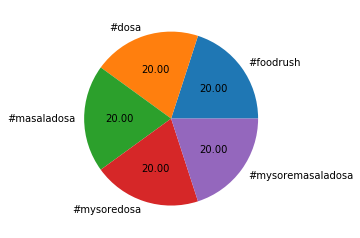

In [69]:
def plot_hashtags(freq_hashtags):
    sorted_hashtags = np.array(sorted(freq_hashtags.items(), key=lambda kv: kv[1],reverse = True)[:5])
    plt.pie(sorted_hashtags[:,1],labels = sorted_hashtags[:,0],autopct ="%.2f")
    plt.show()
    
plot_hashtags(freq_hashtags)

In [70]:
driver.find_element_by_xpath("//div[@class = 'LWmhU _0aCwM']").click()
driver.find_element_by_xpath("//div[@class = 'LWmhU _0aCwM']/input").clear()

# 3

In [71]:
def avg_like_count(total_posts):
    avg_likes = {}
    for handle in total_posts.keys():
        driver.find_element_by_xpath("//div[@class = 'LWmhU _0aCwM']/input").send_keys(handle)
        time.sleep(2)

        wait = WebDriverWait(driver, 10)
        element = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class = 'fuqBx']/a")))
        driver.find_element_by_xpath("//div[@class = 'fuqBx']/a").click()

        total_likes = 0
        count = 1

        for post in driver.find_elements_by_xpath("//article[@class = 'ySN3v']//div[contains(@class,'Nnq7C')]/div"):
            post.click()
            time.sleep(2)
            try:
                total_likes += int(float(driver.find_element_by_xpath("//div[@class = 'Nm9Fw']/button/span").text.replace(',','')))
            except NoSuchElementException:
                driver.find_element_by_xpath("//section[contains(@class,'EDfFK')]/div/span").click()
                total_likes += int(float(driver.find_element_by_xpath("//div[@class = 'vJRqr']/span").text.replace(',','')))

            time.sleep(2)
            driver.find_element_by_xpath("//button[@class = 'ckWGn']").click()
            if count >= 10:
                break
            count = count + 1
        avg_likes[handle] = (total_likes/10)

    return avg_likes

In [73]:
avg_likes = avg_like_count(total_posts)

In [74]:
def follower_like_ratio(avg_likes,handle_follower):
    follower_like = {}
    for key in avg_likes:
        follower_like[key] = avg_likes[key]/handle_follower[key]


    follower_like_array = np.array(sorted(follower_like.items(), key=lambda kv: kv[1],reverse = True))
    return follower_like_array

In [75]:
follower_like_array = follower_like_ratio(avg_likes,handle_follower)

In [76]:
def plot_ratio(follower_like_array):
    y_ticks = np.arange(0,0.055,0.005)
    x_pos = []
    y_pos = []

    for i in follower_like_array:
        x_pos.append(i[0])
        y_pos.append(float(i[1]))


    plt.bar(x_pos,y_pos,width = 0.6,color = 'cyan',edgecolor = 'black')
    plt.xticks(rotation = 45)
    plt.yticks(y_ticks,rotation = 30)
    plt.ylabel('Follower:Like Ratio')
    plt.title("Follower:Like Ratio of  Top 5 Insta-Handles")
    for i in range(len(x_pos)):
        plt.text(x_pos[i],y_pos[i]+0.0004,round(float(y_pos[i]),4),horizontalalignment='center')
    plt.show()

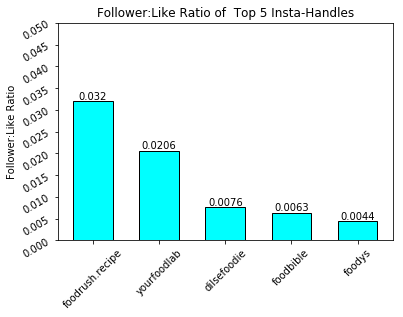

In [77]:
plot_ratio(follower_like_array)

In [78]:
def logout():
    wait = WebDriverWait(driver, 10)
    element = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class = 'XrOey']")))
    driver.find_elements_by_xpath("//div[@class = 'XrOey']")[2].click()
    
    wait = WebDriverWait(driver, 10)
    element = wait.until(EC.presence_of_element_located((By.XPATH, "//button[@class = 'dCJp8 afkep']")))
    driver.find_element_by_xpath("//button[@class = 'dCJp8 afkep']").click()
    
    wait = WebDriverWait(driver, 10)
    element = wait.until(EC.presence_of_element_located((By.XPATH, "//button[@class = 'aOOlW   HoLwm ']")))
    driver.find_elements_by_xpath("//button[@class = 'aOOlW   HoLwm ']")[8].click()
    

In [80]:
logout()